# Molten Salt Fast Reactor - Transients

In [1]:
import numpy as np
import matplotlib.pyplot as plt

default_values = {'T-source': dict(), 'U-source': dict()}
ulohs_values = {'T-source': dict()}
overspeed_values = {'U-source': dict()}
uloff_values = {'U-source': dict()}

Let us define the default values

In [2]:
default_values['T-source'] = {'explicit': dict(), 'implicit': dict()}

default_values['T-source']['explicit'] = {'h': 2.5e6,
                                          'Text': 900,
                                          'rhocp': 6864637.337}
default_values['T-source']['implicit'] = {'h': 2.5e6,
                                          'rhocp': 6864637.337}

################################################################

default_values['U-source'] = {'explicit': dict()}

default_values['U-source']['explicit'] = {'v1': 0.,
                                          'v2': 0.,
                                          'v3': -26.6}

## Unprotected Loss of Heat Sink

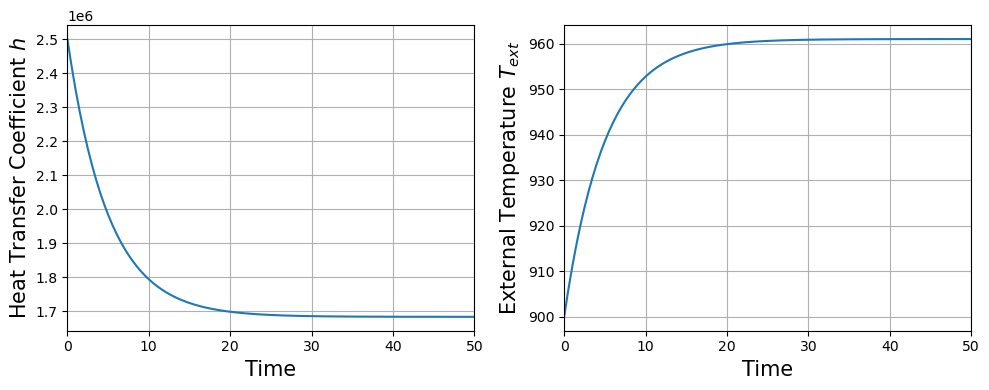

In [3]:
time = np.linspace(0, 50, 200)

ulohs_values['T-source'] = {'explicit': dict(), 'implicit': dict()}
ulohs_values['T-source']['explicit'] = {'h': lambda t: 2.5e6-(2.5e6-1.684e6)*(1-np.exp(-t/5)),
                                        'Text': lambda t: 900+(961-900)*(1-np.exp(-t/5))}
ulohs_values['T-source']['implicit'] = {'h': lambda t: 2.5e6-(2.5e6-1.684e6)*(1-np.exp(-t/5))}

fig,axs = plt.subplots(1, 2, figsize=(10,4), sharex=True)

axs[0].plot(time, ulohs_values['T-source']['explicit']['h'](time))
axs[0].set_xlim(min(time), max(time))
axs[0].grid()
axs[0].set_xlabel(r'Time', fontsize=15)
axs[0].set_ylabel(r'Heat Transfer Coefficient $h$', fontsize=15)

axs[1].plot(time, ulohs_values['T-source']['explicit']['Text'](time))
axs[1].set_xlim(min(time), max(time))
axs[1].grid()
axs[1].set_xlabel(r'Time', fontsize=15)
axs[1].set_ylabel(r'External Temperature $T_{ext}$', fontsize=15)

plt.tight_layout()

## Unprotected Loss of Fluid Flow

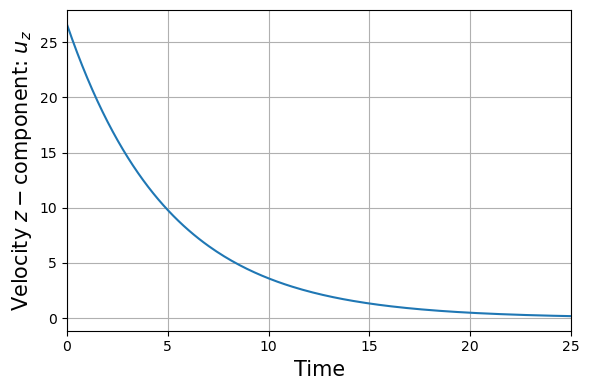

In [4]:
time = np.linspace(0, 25, 200)

overspeed_values['U-source'] = {'explicit': dict()}
overspeed_values['U-source']['explicit'] = {'v1': 0.,
                                        'v2': 0.,
                                        'v3': lambda t: -26.6*np.exp(-t/5)}

fig,axs = plt.subplots(1, 1, figsize=(6,4), sharex=True)

axs.plot(time, np.abs(overspeed_values['U-source']['explicit']['v3'](time)))
axs.set_xlim(min(time), max(time))
axs.grid()
axs.set_xlabel(r'Time', fontsize=15)
axs.set_ylabel(r'Velocity $z-$component: $u_z$', fontsize=15)

plt.tight_layout()

## OVERSPEED

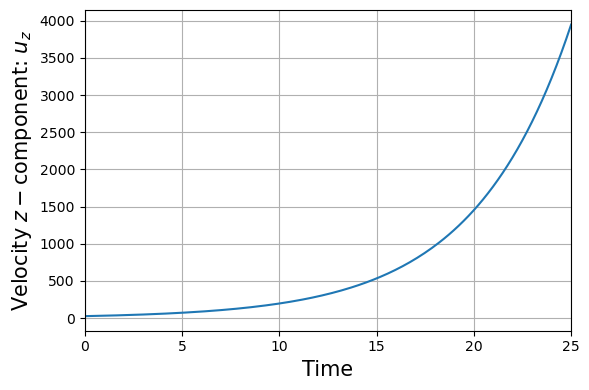

In [5]:
time = np.linspace(0, 25, 200)

overspeed_values['U-source'] = {'explicit': dict()}
overspeed_values['U-source']['explicit'] = {'v1': 0.,
                                        'v2': 0.,
                                        'v3': lambda t: -26.6*np.exp(t/5)}

fig,axs = plt.subplots(1, 1, figsize=(6,4), sharex=True)

axs.plot(time, np.abs(overspeed_values['U-source']['explicit']['v3'](time)))
axs.set_xlim(min(time), max(time))
axs.grid()
axs.set_xlabel(r'Time', fontsize=15)
axs.set_ylabel(r'Velocity $z-$component: $u_z$', fontsize=15)

plt.tight_layout()